Nama: Ayu Wulandari


Email: dari19556@gmail.com

Tugas: Membuat model untuk klasifikasi teks pada modul Natural Language Processing pada dicoding

Kriteria Submission yang dibuat:

1.   Dataset yang digunakan memiliki 50000sampel
2.   Menggunakan LSTM dalam arsitektur model
3. Menggunakan model sequential
4. Validation set sebesar 20% dari total data set (10000 val_set)
5. Menggunakan Embedding
6. Mengimplementasikan callback
7. Membuat plot loss dan akurasi pada saat training dan validation



# **Menyambungkan ke google drive untuk membaca dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Mempersiapkan Data**

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/DataSet/Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# **Melihat rangkuman dari DataFrame**

In [3]:
print(data.shape)
data.info()
data.describe()

(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# **Distribusi Kelas**

In [4]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# **Proses One-Hot-Encoding dan Membuat Dataframe Baru**

In [5]:
category = pd.get_dummies(data.sentiment)
data_baru = pd.concat([data, category], axis=1)
data_baru = data_baru.drop(columns = 'sentiment')
data_baru

,review,negative,positive
0,One of the other reviewers has mentioned that ...,0,1
1,A wonderful little production. <br /><br />The...,0,1
2,I thought this was a wonderful way to spend ti...,0,1
3,Basically there's a family where a little boy ...,1,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,1
...,...,...,...
49995,I thought this movie did a down right good job...,0,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",1,0
49997,I am a Catholic taught in parochial elementary...,1,0
49998,I'm going to have to disagree with the previou...,1,0


# **Memisahkan Data menjadi 80% untuk training dan 20% untuk testing**

In [6]:
from sklearn.model_selection import train_test_split

text = data_baru['review'].values
y = data_baru[['negative', 'positive']].values
text_train, text_test, y_train, y_test = train_test_split(text, y, 
                                                          test_size=0.2, 
                                                          random_state = 0)
[x. shape for x in [text_train, text_test]]

[(40000,), (10000,)]

# **Implementasi Tokenizer**

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [8]:
print(tokenizer.word_index)

{'x': 1729, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'be': 27, 'one': 28, 'he': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'so': 35, 'who': 36, 'from': 37, 'like': 38, 'or': 39, 'just': 40, 'her': 41, 'out': 42, 'about': 43, 'if': 44, "it's": 45, 'has': 46, 'there': 47, 'some': 48, 'what': 49, 'good': 50, 'when': 51, 'more': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'my': 57, 'even': 58, 'would': 59, 'she': 60, 'which': 61, 'only': 62, 'really': 63, 'see': 64, 'story': 65, 'their': 66, 'had': 67, 'can': 68, 'me': 69, 'well': 70, 'were': 71, 'than': 72, 'much': 73, 'we': 74, 'bad': 75, 'been': 76, 'get': 77, 'do': 78, 'great': 79, 'other': 80, 'will': 81, 'also': 82, 'into': 83, 'people': 84, 'because': 85, 'how': 86, 'first': 87, 'him': 88, 'most': 

# **Implementasi callback**

In [9]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
callback = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=2
)

# **Implementasi Model Sequential dengan Embedding dan LSTM**

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])



In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          80000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 117,442
Trainable params: 117,442
Non-trainable params: 0
_________________________________________________________________


# **Pelatihan Model**

In [12]:
history = model.fit(padded_latih, y_train, epochs=10, 
                        validation_data=(padded_test, y_test), 
                        verbose=1,
                        batch_size = 258,
                        callbacks=[callback])

Epoch 1/10
156/156 [==============================] - 32s 158ms/step - loss: 0.4403 - accuracy: 0.7857 - val_loss: 0.5188 - val_accuracy: 0.8424
Epoch 2/10
156/156 [==============================] - 24s 155ms/step - loss: 0.2598 - accuracy: 0.8960 - val_loss: 0.3260 - val_accuracy: 0.8670
Epoch 3/10
156/156 [==============================] - 24s 155ms/step - loss: 0.2229 - accuracy: 0.9131 - val_loss: 0.2756 - val_accuracy: 0.8896
Epoch 4/10
156/156 [==============================] - 24s 155ms/step - loss: 0.2055 - accuracy: 0.9207 - val_loss: 0.2789 - val_accuracy: 0.8812
Epoch 5/10
156/156 [==============================] - 25s 157ms/step - loss: 0.1933 - accuracy: 0.9271 - val_loss: 0.2908 - val_accuracy: 0.8815
Epoch 6/10
156/156 [==============================] - 25s 161ms/step - loss: 0.1785 - accuracy: 0.9331 - val_loss: 0.3133 - val_accuracy: 0.8704
Epoch 7/10
156/156 [==============================] - 26s 164ms/step - loss: 0.1769 - accuracy: 0.9341 - val_loss: 0.3219 - val_ac

# **Membuat plot loss dan akurasi pada saat training dan validation**

In [13]:
import matplotlib.pyplot as plt
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Plot Training dan Validasi Akurasi')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Plot Training dan Validasu Loss')
    plt.legend()

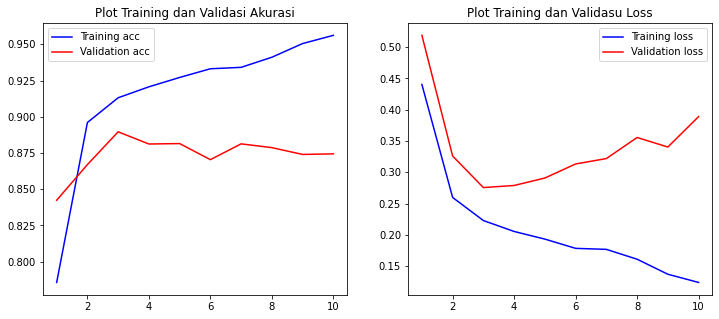

In [14]:
plot_history(history)